In [32]:
#Quick fix for plotting training and validation loss
#Long term fix is to use tensorboard

In [86]:
import matplotlib.pyplot as plt
import os
import json
import numpy as np

'/home/jupyter/nuscenes-devkit/python-sdk/nuscenes/eval/prediction'

In [34]:
EXPERIMENT_DIR = '/home/jupyter/experiments/04'

In [40]:
#merge all files of the form train_results_ or val_results_
#the assumption is that all result files in a single directory belong to the same experiment

training_results_files = [filename for filename in os.listdir(EXPERIMENT_DIR) if filename.startswith('train_results_')]
validation_results_files = [filename for filename in os.listdir(EXPERIMENT_DIR) if filename.startswith('val_results_')]

['train_results_2020-06-27 22h20m01s.json', 'train_results_2020-06-27 16h57m05s.json', 'train_results_2020-06-27 21h04m45s.json']


In [74]:
def Merge(dict1, dict2): 
    return(dict2.update(dict1)) 

def aggregate_all_results_across_phase(results_files):
    all_results = {}
    for filename in results_files:
        with open(os.path.join(EXPERIMENT_DIR, filename)) as json_file:
            results = json.load(json_file)
            Merge(results, all_results)

    return all_results

def extract_loss_ordered_by_epoch(results):
    loss_at_epoch = {}
    for key, value in results.items():
        loss_at_epoch[int(value['epoch'])] = value['loss']
    losses = [loss_at_epoch[epoch] for epoch in sorted(loss_at_epoch.keys())]

    print(loss_at_epoch)
    print(losses)
    return losses

In [75]:
training_results = aggregate_all_results_across_phase(training_results_files)
validation_results = aggregate_all_results_across_phase(validation_results_files)

In [76]:
train_losses = extract_loss_ordered_by_epoch(training_results)
validation_losses = extract_loss_ordered_by_epoch(validation_results)

{4: 4.677512303771215, 5: 4.6041128812889305, 6: 4.188938989236988, 0: 6.693066298813737, 1: 5.97960696918497, 2: 5.621523595625354, 3: 5.203187143832223}
[6.693066298813737, 5.97960696918497, 5.621523595625354, 5.203187143832223, 4.677512303771215, 4.6041128812889305, 4.188938989236988]
{3: 6.954208289351419, 0: 6.793912531059479, 1: 6.383432513085481, 2: 6.399047976342317, 4: 8.102618319965968, 5: 8.12539479442846, 6: 8.298585789225926}
[6.793912531059479, 6.383432513085481, 6.399047976342317, 6.954208289351419, 8.102618319965968, 8.12539479442846, 8.298585789225926]


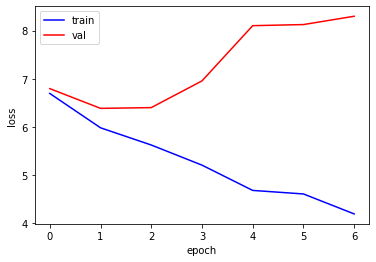

In [85]:
epochs = np.arange(0, len(train_losses))
plt.plot(epochs, train_losses, color='blue')
plt.plot(epochs, validation_losses, color='red')
plt.legend(['train', 'val'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()